<a href="https://colab.research.google.com/github/gencross/NewtonGroup1/blob/main/Main_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Newtons Method can be used to find the roots of a differentiable function $f(x)$. Given a starting guess, $x_{0}$, $x_{n+1}$ is defined as $x_{n} - \frac{f(x_{n})}{f'(x_{n})} $. Depending on the choice of $x_{0}$, the series $x_{n}$ may approach different real and complex roots of the function. This project explored visualization of Newton's Method as a function of the initial guess, $x_{0}$. Using numpy, we iterated Newton's method over large complex arrays in the neighborhood of particular roots. We then used (PIL) and Matlab in order to visualize the results of Newton's Method over the entire array. Our exploration began with more open ended functions intended to give us a general sense of the types of results generated by Newton's Method. The code used in this notebook has been simplified to generate our two selected graphics more efficiently.

# Fractal from Basins of Attraction

We will identify the basins of attraction of the polynomial
$$
f(x) = x^5 - x^4 - 5x^3 - 5x^2 + 4x + 6.
$$

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def newton(root, steps=100):
  '''
  Returns the root of 'root' using Newton's method.
  'steps' is the number of iterations to perform.
  Input can be a complex number or an array of complex
  numbers.
  '''
  for i in range(steps):
    root = root - ((6 + 4*root - 5*(root**2) - 5*(root**3) - root**4 + root**5) / (4 - 10*root - 15*(root**2) - 4*(root**3) + 5*(root**4)))
  return root

In [ ]:
%timeit newton(4)

10000 loops, best of 5: 111 µs per loop


This is the function that we'll be using to compute our roots. $f(x) = x^5 - x^4 - 5x^3 - 5x^2 + 4x + 6$ has 5 roots, so every value that we run through `newton()` should end pretty close to one of those roots. Let's verify that it works correctly:

In [ ]:
steps = 20

for r in [-1,-1-1j,-1+1j,1,3,4,0,-2j]:
    n = newton(r, steps=steps)
    print('Newton applied to {} yields {} after 20 steps'.format(r, n, steps))

Newton applied to -1 yields -1.0 after 20 steps
Newton applied to (-1-1j) yields (-1-1j) after 20 steps
Newton applied to (-1+1j) yields (-1+1j) after 20 steps
Newton applied to 1 yields 1.0 after 20 steps
Newton applied to 3 yields 3.0 after 20 steps
Newton applied to 4 yields 3.0 after 20 steps
Newton applied to 0 yields -1.0 after 20 steps
Newton applied to (-0-2j) yields (-1+0j) after 20 steps


This is nowhere near exhaustive, but it looks like everything is working. Next, we'll make an array of complex numbers to evaluate using `newton()`.

In [ ]:
real_min = -1
real_max = 3
imag_min = -2
imag_max = 2
resolution = 750

x_array = np.linspace(real_min,real_max, resolution * (real_max-real_min) )
y_array = np.linspace(imag_min,imag_max, resolution * (imag_max-imag_min) )

c_array = np.add.outer(x_array,y_array*1j)
c_array.shape

(3000, 3000)

So, we have a 3000x3000 array of evenly spaced complex numbers. Now let's apply `newton()` and see which root they approach.

In [ ]:
fractal_array = newton(c_array)
fractal_array[1035:1045,978:988]

array([[-1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
        -1.+0.j, -1.+0.j, -1.+0.j],
       [-1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
        -1.+0.j, -1.+0.j, -1.+0.j],
       [-1.+1.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
        -1.+0.j, -1.+0.j, -1.+0.j],
       [-1.-1.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
        -1.+0.j, -1.+0.j, -1.+0.j],
       [-1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
        -1.+0.j, -1.+0.j, -1.+0.j],
       [-1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
        -1.+0.j, -1.+0.j, -1.+0.j],
       [-1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
        -1.+0.j, -1.+0.j, -1.+0.j],
       [-1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
        -1.+0.j, -1.+0.j, -1.+0.j],
       [-1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
        -1.+0.j, -1.+0.j, -1.+0.j],
       [-1.+0.j, -1.+0.j, -1.+0.j, -1

These values all went to -1, which is a root, so that's a good sign. But, every value doesn't go to -1. We're going to use PIL to draw a picture which will communicate which root each value goes to. First, we need to pick a color scheme. The following code displays which colors we'll use.

In [ ]:
def show_block(r,g,b):
    red_channel = np.full((25,50),r, dtype=np.uint8)
    green_channel = np.full((25,50),g, dtype=np.uint8)
    blue_channel = np.full((25,50),b, dtype=np.uint8)
  
    solid = np.stack((red_channel,green_channel,blue_channel), axis=-1) # Stack the channels together.
    img = Image.fromarray(solid) # Create an image from the array.
    display(img)
    
show_block(1,31,75) # root -1
show_block(3,57,108) # root 3
show_block(0,91,150) # root 1
show_block(100,151,177) # root -1-i
show_block(179,205,224) # root -1+i

That looks pretty good. Now, we need to draw the image, pixel by pixel. The following code iterates through `fractal_array`, entry by entry, and assigns a color to our picture based on which root the entry reached. So, each pixel in our picture will correspond to a point in the complex plane.

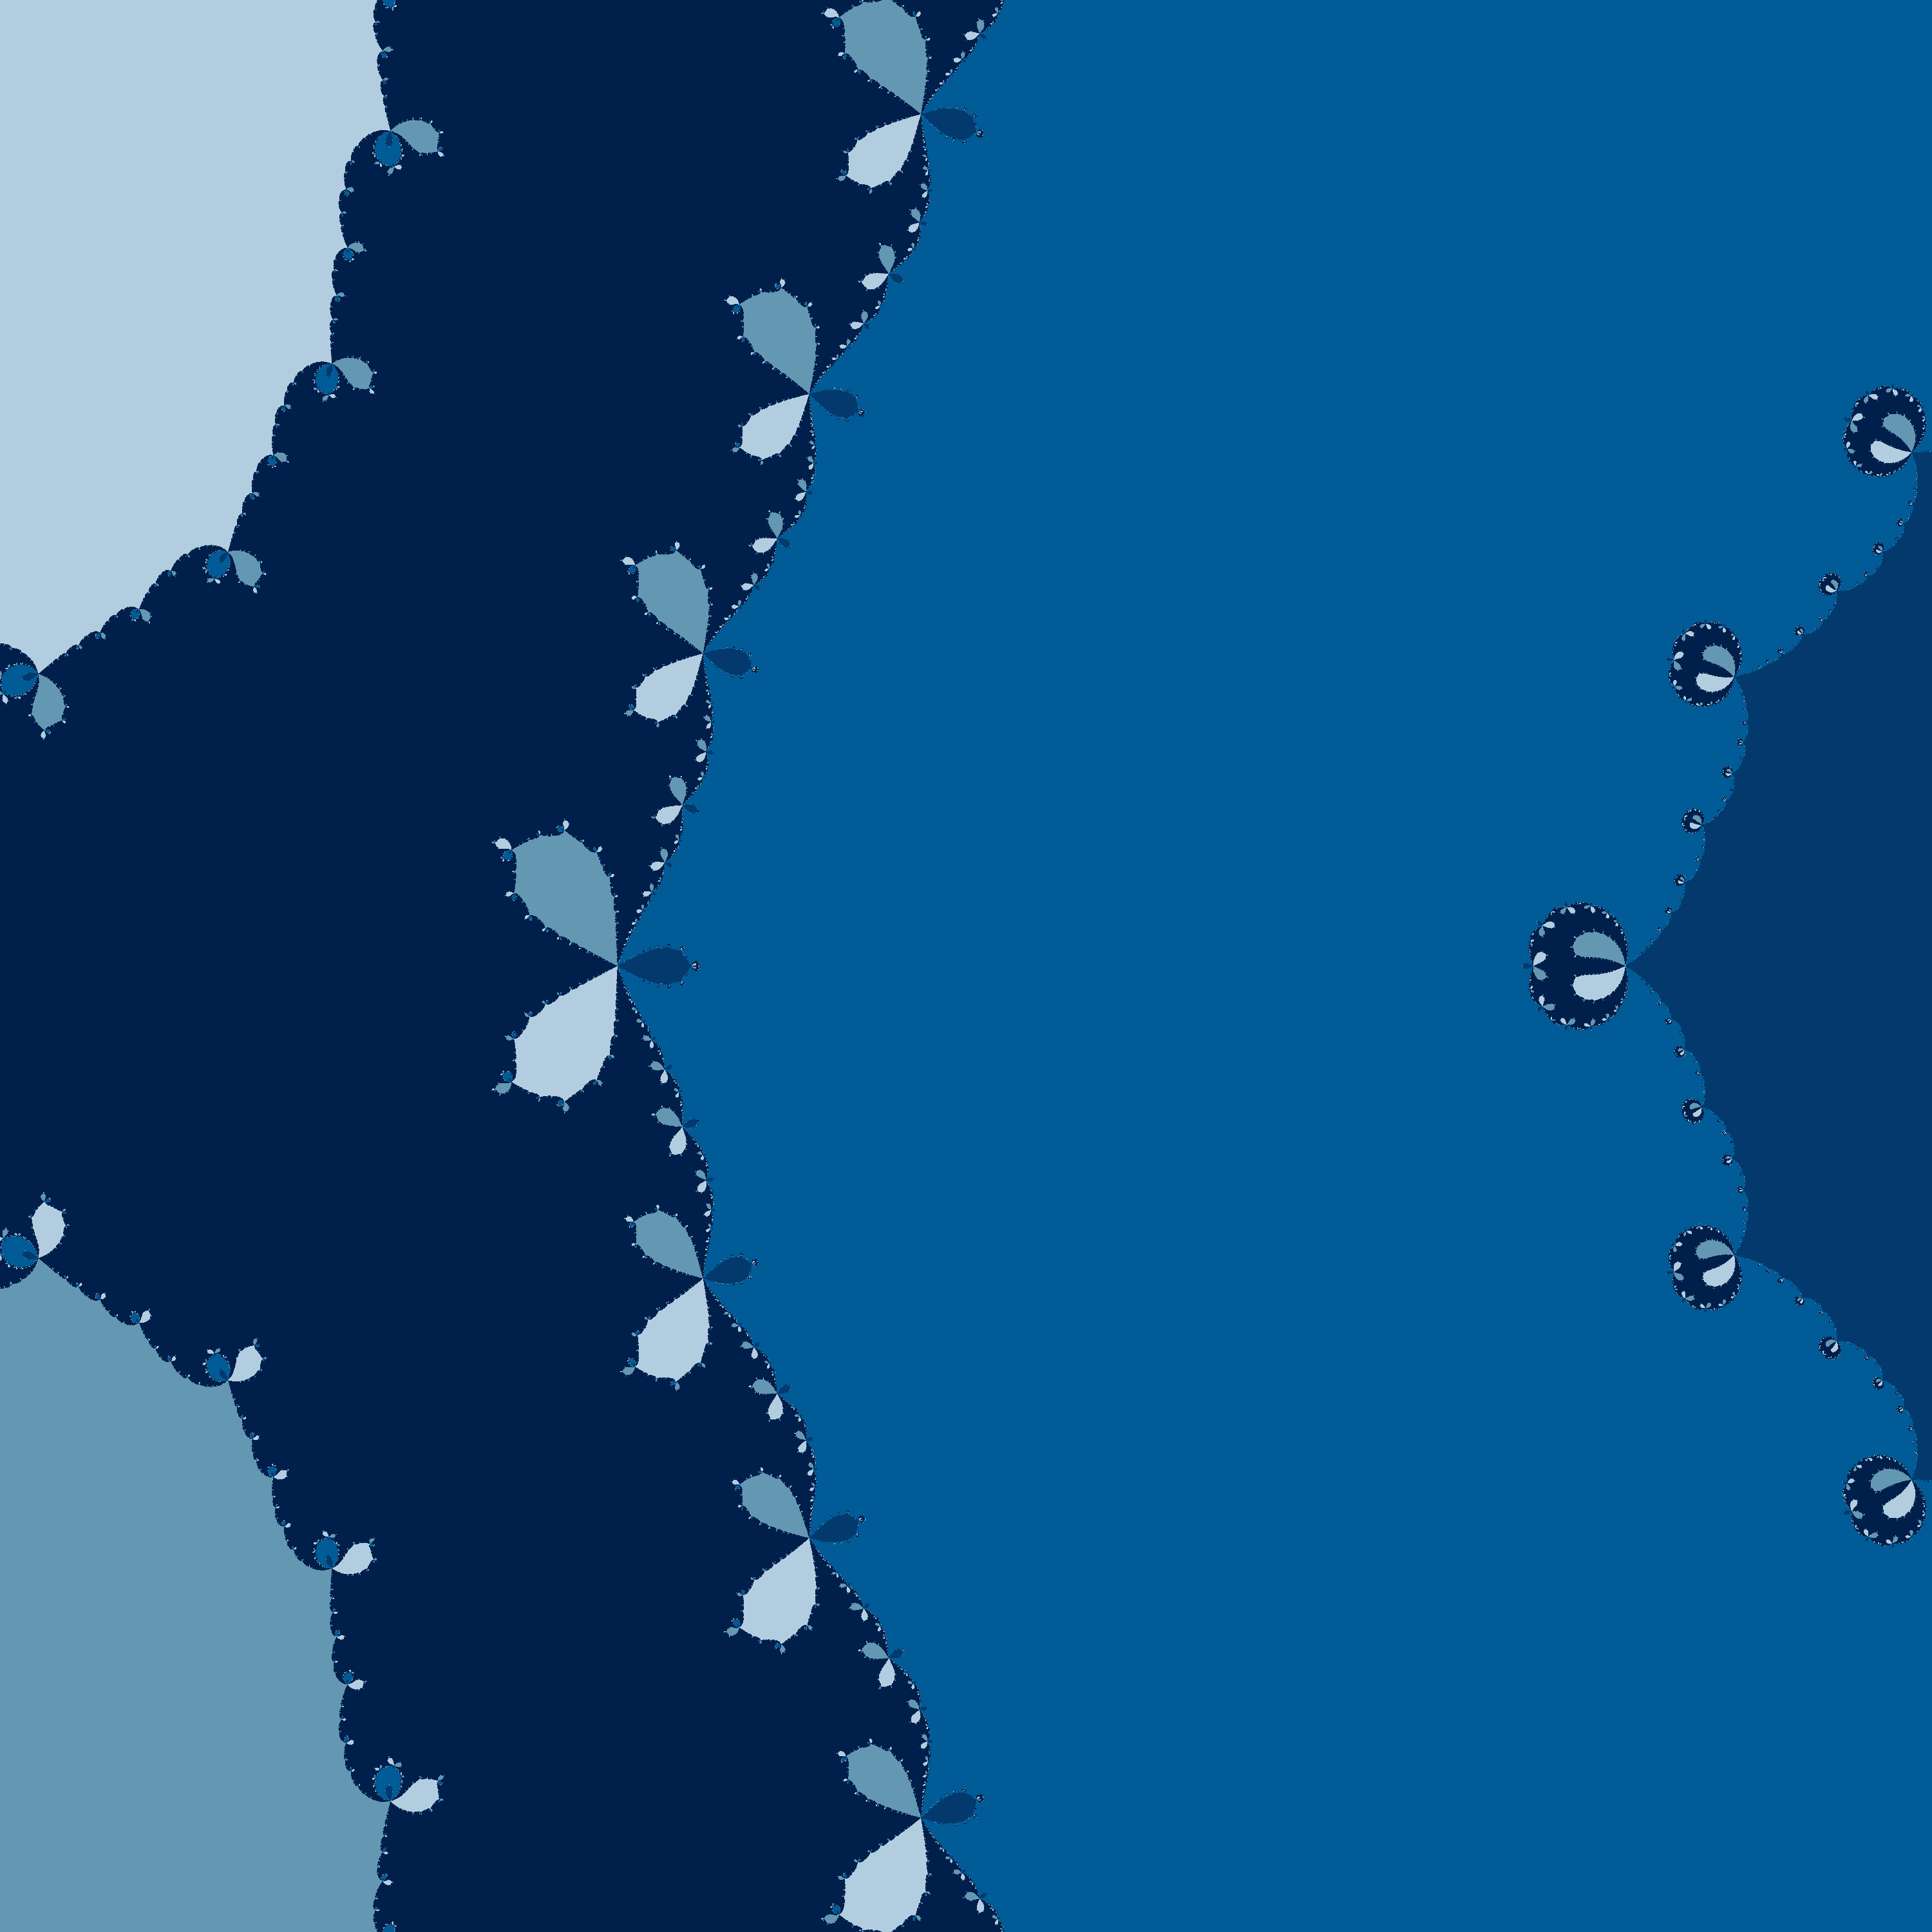

In [ ]:
fractal = np.zeros((3000, 3000, 3), dtype=np.uint8)
for x in range(3000):
    for y in range(3000):
        if fractal_array[x,y].imag == 0: # Real roots
            if fractal_array[x,y].real < 0: # -1
                fractal[y,x] = [1,31,75]
            if fractal_array[x,y].real > 0: # Positive real roots
                if fractal_array[x,y].real > 2: # 3
                    fractal[y,x] = [3,57,108]
                else:
                    fractal[y,x] = [0,91,150] # 1
        if fractal_array[x,y].imag < 0: # -1-i
            fractal[y,x] = [100,151,177]
        if fractal_array[x,y].imag > 0: # -1+i
            fractal[y,x] = [179,205,224]

fractal = np.flip(fractal, 0) # Vertical flip to compensate for the way PIL compiles values
img = Image.fromarray(fractal)
display(img)

Beautiful!

# Convergence Speed

When we use Newton's method to find roots, some values approach roots much more quickly than others. Let's see which values "converge" quickly and which ones don't.

In [ ]:
def newton_step(z,root):
  '''
  Returns how many steps it takes for 'z' to get
  within 0.00001 of 'root' using Newton's method
  and the same polynomial as before.
  Both z and root need to be complex numbers, 
  not arrays.
  '''
  step = 0
  orig = z
  while np.absolute(orig-root) > 0.00001:
    orig = orig - ((6 + 4*orig - 5*(orig**2) - 5*(orig**3) - orig**4 + orig**5) / (4 - 10*orig - 15*(orig**2) - 4*(orig**3) + 5*(orig**4)))
    step += 1
  return step

In [ ]:
%timeit newton_step(3+2j,1+0j)

The slowest run took 9.46 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 21.7 µs per loop


The above function check how many steps it takes for a value to get within 0.00001 of a root. Now, let's make another array of complex numbers with the same dimensions as before.

In [ ]:
realstep_min = -1
realstep_max = 3
imagstep_min = -2
imagstep_max = 2
resolution = 750

realpart_array = np.linspace(realstep_min,realstep_max, resolution * (realstep_max-realstep_min) )
imagpart_array = np.linspace(imagstep_min,imagstep_max, resolution * (imagstep_max-imagstep_min) )

c_array = np.add.outer(realpart_array,imagpart_array*1j).flatten()
realpart = c_array.real
imagpart = c_array.imag

We have to "flatten" our array this time so that it plays nicely with matplotlib. This just makes it one-dimensional instead of two. Now, we'll make a new array using `newton_steps()`. Each entry in `step_array` represents a point in the complex plane, and the value of that entry will be the number of steps that it takes for that point to converge to any root.

In [ ]:
step_array = [newton_step(z,r) for z,r in np.stack((c_array, fractal_array.flatten()), axis=-1)]

Now, we'll plot `step_array` using a haxagonal binning plot. We're using a high density of hexagons, so it looks pretty smooth. The color of the hexagon represents the average number of steps for each point that it covers.

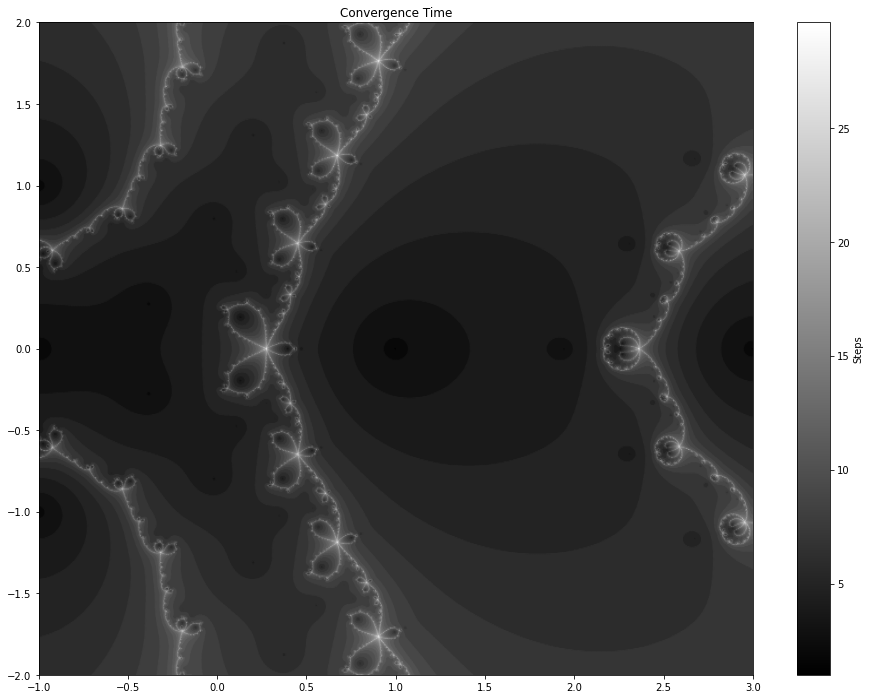

In [ ]:
x = realpart
y = imagpart
z = step_array
xmin = realpart_array.min()
xmax = realpart_array.max()
ymin = imagpart_array.min()
ymax = imagpart_array.max()

plt.figure(figsize=(16,12))
plt.hexbin(x, y,C=z,gridsize=(1000), cmap=plt.cm.gray) #C forces values into each bin
cb = plt.colorbar()
cb.set_label('Steps')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.title('Convergence Time')
plt.show()

Surprisingly, it matches the the fractal! Points close to the edge of each basin converge slowly, while points near the conter converge almost immediately.

# Conclusion

This exploration of Newton's Method has paired extremely well with the data management and visualisation techniques we have learned. Numpy's efficient array operations were invaluable in making this code run reasonably quickly. PIL was perfectly suited to display the massive complex array in a visually intuitive manner. Matlab was used to display the speed of Newton's Method from different starting guesses. Learning to work with all of these tools allowed us to understand the practical mechanics of Newton's Method in a new way, one which would have been entirely unapproachable otherwise.